In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("Breast_GSE45827.csv")

In [3]:
df.head()
df.shape


(151, 54677)

In [4]:
ord_enc = OrdinalEncoder()
df["type"] = ord_enc.fit_transform(df[["type"]])
df["type"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
146    4.0
147    4.0
148    4.0
149    4.0
150    4.0
Name: type, Length: 151, dtype: float64

In [5]:
X=df.drop(columns='type')
y=df['type']

In [6]:
from sklearn.preprocessing import StandardScaler
# get the features and label from the original dataframe
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [7]:
xtrain, xtest, ytrain, ytest=train_test_split(X_scaled, y, train_size=0.6, random_state=1)
print(len(xtest))

61


In [8]:
classifier= KNeighborsClassifier(n_neighbors=5,p=2, metric="euclidean")

In [9]:
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean')

In [10]:
xtest=sc.fit_transform(xtest)

In [11]:
y_pred= classifier.predict(xtest)
y_pred

array([0., 3., 2., 1., 4., 0., 3., 0., 1., 3., 3., 0., 3., 0., 2., 0., 3.,
       1., 1., 1., 5., 2., 2., 1., 3., 3., 0., 0., 2., 3., 5., 4., 0., 4.,
       3., 0., 0., 1., 0., 3., 4., 1., 3., 3., 0., 3., 1., 1., 0., 0., 0.,
       0., 3., 4., 3., 4., 3., 5., 3., 3., 1.])

In [12]:
cm=np.array(confusion_matrix(ytest,y_pred))
print(cm)

[[11  1  0  0  0  0]
 [ 6 10  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0 14  1  0]
 [ 0  0  0  5  5  0]
 [ 0  0  0  0  0  3]]


In [13]:
accuracy_score(ytest,y_pred)

0.7868852459016393

In [14]:
report = classification_report(ytest, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.65      0.92      0.76        12
         1.0       0.91      0.62      0.74        16
         2.0       1.00      1.00      1.00         5
         3.0       0.74      0.93      0.82        15
         4.0       0.83      0.50      0.62        10
         5.0       1.00      1.00      1.00         3

    accuracy                           0.79        61
   macro avg       0.85      0.83      0.82        61
weighted avg       0.81      0.79      0.78        61



In [15]:
print(metrics.classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.92      0.76        12
         1.0       0.91      0.62      0.74        16
         2.0       1.00      1.00      1.00         5
         3.0       0.74      0.93      0.82        15
         4.0       0.83      0.50      0.62        10
         5.0       1.00      1.00      1.00         3

    accuracy                           0.79        61
   macro avg       0.85      0.83      0.82        61
weighted avg       0.81      0.79      0.78        61



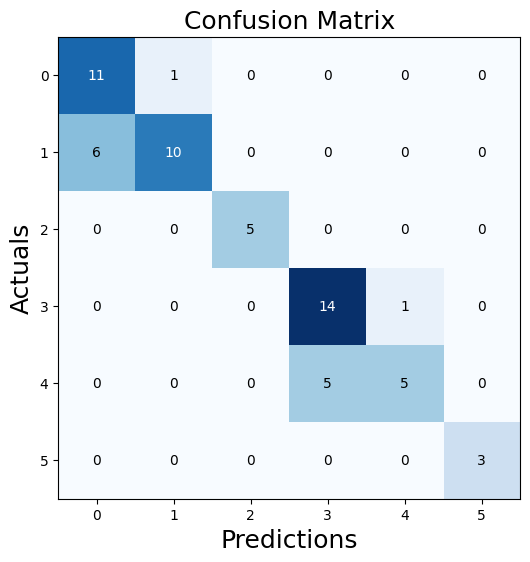

In [16]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [23]:
n_classes = len(np.unique(y_pred))  # Replace y with your target variable
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_true = (ytest == i).astype(int)
    y_score = (y_pred == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
colors = ['red', 'blue', 'green', 'cyan','yellow','black']  # Add more colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [38, 61]

ACCURACY:  90.1639344262295
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        16
         2.0       0.56      1.00      0.71         5
         3.0       0.88      1.00      0.94        15
         4.0       1.00      0.70      0.82        10
         5.0       0.00      0.00      0.00         3

    accuracy                           0.90        61
   macro avg       0.74      0.78      0.75        61
weighted avg       0.89      0.90      0.88        61

[[12  0  0  0  0  0]
 [ 0 16  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0 15  0  0]
 [ 0  0  1  2  7  0]
 [ 0  0  3  0  0  0]]


C:\Users\PALLAVI MADDULA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PALLAVI MADDULA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PALLAVI MADDULA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

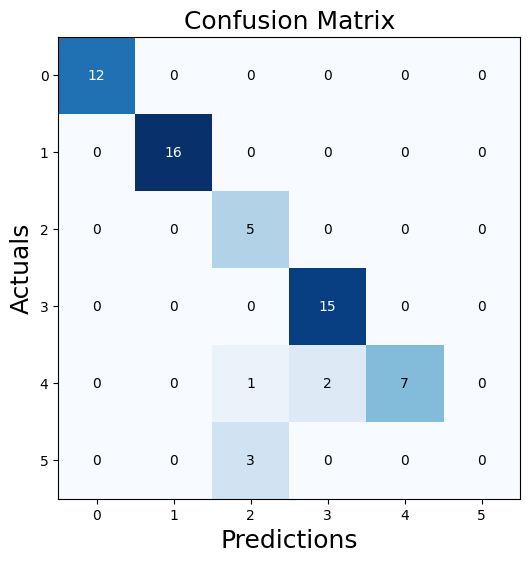

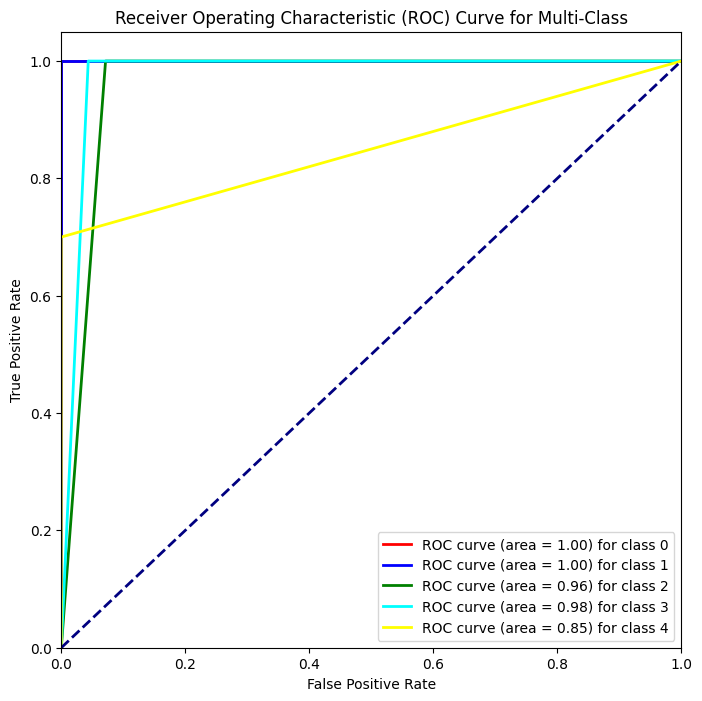

In [18]:
from sklearn.tree import DecisionTreeClassifier


#xtrain,xtest,ytrain,ytest= train_test_split(X,y,random_state=1,test_size=0.25)

forest_model= DecisionTreeClassifier(criterion="entropy",random_state=0,
max_depth=3,min_samples_leaf=5);
forest_model.fit(xtrain, ytrain)
preds= forest_model.predict(xtest)

print('ACCURACY: ',accuracy_score(ytest,preds)*100)
print(metrics.classification_report(ytest, preds))


cm=np.array(confusion_matrix(ytest,preds))
print(cm)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()




n_classes = len(np.unique(preds))  # Replace y with your target variable
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_true = (ytest == i).astype(int)
    y_score = (preds == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
colors = ['red', 'blue', 'green', 'cyan','yellow','black']  # Add more colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()



ACCURACY:  93.44262295081968
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        12
         1.0       0.94      0.94      0.94        16
         2.0       1.00      1.00      1.00         5
         3.0       1.00      0.93      0.97        15
         4.0       0.90      0.90      0.90        10
         5.0       1.00      1.00      1.00         3

    accuracy                           0.93        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.94      0.93      0.94        61

[[11  1  0  0  0  0]
 [ 1 15  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0 14  1  0]
 [ 1  0  0  0  9  0]
 [ 0  0  0  0  0  3]]


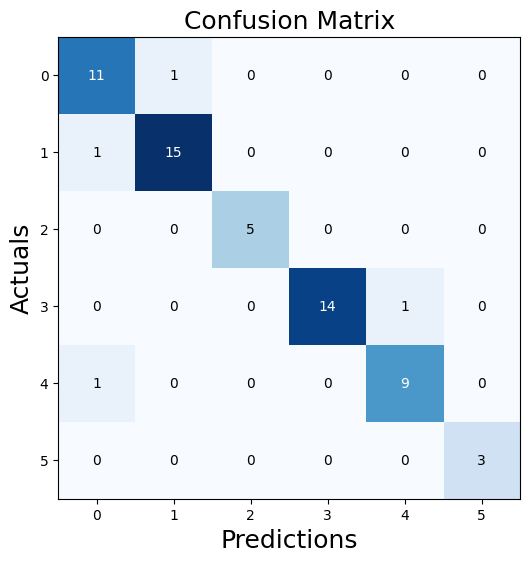

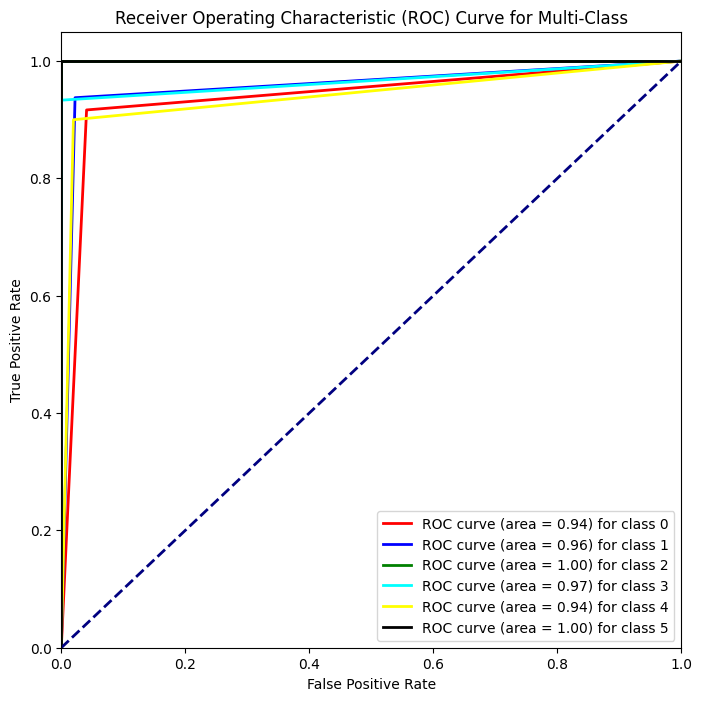

In [19]:
from sklearn.ensemble import RandomForestClassifier


forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(xtrain, ytrain)
preds= forest_model.predict(xtest)

print('ACCURACY: ',accuracy_score(ytest,preds)*100)
print(metrics.classification_report(ytest, preds))


cm=np.array(confusion_matrix(ytest,preds))
print(cm)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()




n_classes = len(np.unique(preds))  # Replace y with your target variable
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_true = (ytest == i).astype(int)
    y_score = (preds == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
colors = ['red', 'blue', 'green', 'cyan','yellow','black']  # Add more colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

ACCURACY:  0.9210526315789473
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         8
         1.0       0.83      1.00      0.91        10
         2.0       1.00      1.00      1.00         5
         3.0       1.00      0.86      0.92         7
         4.0       0.86      1.00      0.92         6
         5.0       1.00      1.00      1.00         2

    accuracy                           0.92        38
   macro avg       0.95      0.93      0.94        38
weighted avg       0.93      0.92      0.92        38

[[ 6  2  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  0  0  6  1  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0  2]]


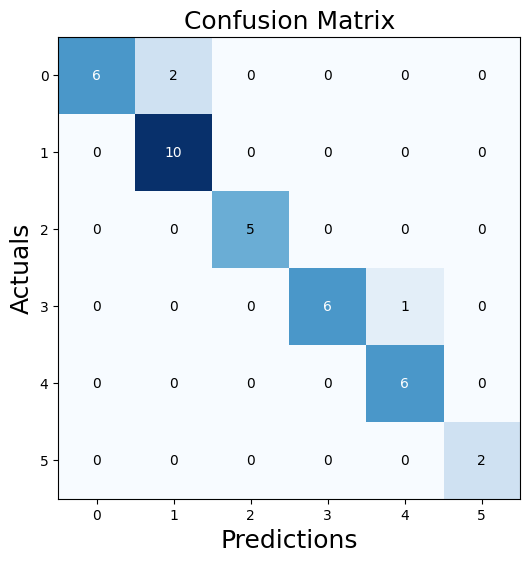

ValueError: Found input variables with inconsistent numbers of samples: [38, 61]

In [22]:
from sklearn.svm import SVC

xtrain,xtest,ytrain,ytest= train_test_split(X_scaled,y,random_state=1,test_size=0.25)


classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(xtrain, ytrain)
pred = classifier.predict(xtest)

print('ACCURACY: ',accuracy_score(ytest,pred))
print(metrics.classification_report(ytest, pred))


cm=np.array(confusion_matrix(ytest,pred))
print(cm)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



n_classes = len(np.unique(preds))  # Replace y with your target variable
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_true = (ytest == i).astype(int)
    y_score = (preds == i).astype(int)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
colors = ['red', 'blue', 'green', 'cyan','yellow','black']  # Add more colors if you have more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming xtrain, xtest, ytrain, ytest are defined

# Concatenate training and testing data for clustering
X = np.concatenate((xtrain, xtest), axis=0)
y = np.concatenate((ytrain, ytest), axis=0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=0)  # You can choose the number of clusters
kmeans.fit(X)

# Predict cluster labels for each data point
cluster_labels = kmeans.predict(X)

# Visualize the clustering using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# Annotate points with cluster names
for i, cluster_center in enumerate(kmeans.cluster_centers_):
    cluster_center_2d = cluster_center[:2]  # Take the first two components
    print(f"Cluster {i} Center: {cluster_center_2d}")
    #plt.annotate(f'Cluster {i}', cluster_center_2d, textcoords="offset points", xytext=(-10, -10), ha='right', fontsize=8)



plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming your original data has class labels in the last column
class_labels = X[:, -1]

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder and transform the class labels
numerical_labels = encoder.fit_transform(class_labels)

# Convert the numerical labels to one-hot encoded labels
one_hot_labels = np.zeros((numerical_labels.shape[0], numerical_labels.max() + 1))
one_hot_labels[np.arange(numerical_labels.shape[0]), numerical_labels] = 1

# Now, one_hot_labels is a matrix where each row represents a data point, and each column represents a class.
# You can use one_hot_labels to color the data points in your scatter plot.

# For example, you can create a scatter plot for the data points, with colors indicating their class labels
plt.scatter(X[:, 0], X[:, 1], c=one_hot_labels, s=50, cmap='viridis')

# Label the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add a legend
plt.legend(encoder.classes_, loc='best')

# Show the plot
plt.show()